# Импорты

In [1]:
import os
import PIL.Image as Image

import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


import torch
import torch.cuda
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

from torchsummary import summary

from LookGenerator.datasets.basic_dataset import BasicDataset
from LookGenerator.networks.clothes_feature_extractor import ClothAutoencoder
from LookGenerator.networks.trainer import Trainer
from LookGenerator.networks.utils import get_num_digits, save_model, load_model
from LookGenerator.networks_training.utils import check_path_and_creat

# Работа с датасетом

In [2]:
transform_input = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

In [3]:
batch_size_train = 128
batch_size_val = 128
pin_memory = True
num_workers = 8

In [4]:
train_dataset = BasicDataset(
    root_dir=r"C:\Users\DenisovDmitrii\Desktop\zalando-hd-resize\train",
    input_dir_name=r"cloth",
    target_dir_name="cloth",
    transform_input=transform_input,
    transform_target=transform_input
)
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size_train, shuffle=True, pin_memory=pin_memory,
    num_workers=num_workers
)

In [5]:
val_dataset = BasicDataset(
    root_dir=r"C:\Users\DenisovDmitrii\Desktop\zalando-hd-resize\test",
    input_dir_name="cloth",
    target_dir_name="cloth",
    transform_input=transform_input,
    transform_target=transform_input
)
val_dataloader = DataLoader(
    val_dataset, batch_size=batch_size_train, shuffle=False, pin_memory=pin_memory,
    num_workers=num_workers
)

In [6]:
print(len(val_dataset), len(val_dataloader))
print(len(train_dataset), len(train_dataloader))

2032 16
11647 91


# Создание директории для сохранения весов

In [7]:
save_directory=r"C:\Users\DenisovDmitrii\OneDrive - ITMO UNIVERSITY\peopleDetector\autoDegradation\weights\testClothes_L1Loss_4features"
check_path_and_creat(save_directory)

True

# Обучение

In [8]:
torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.benchmark = True

In [9]:
criterion = nn.L1Loss()
model = ClothAutoencoder(
    in_channels=3,
    out_channels=3,
    features=(8, 16, 32, 64),
    latent_dim_size=128,
    encoder_activation_func=nn.LeakyReLU(),
    decoder_activation_func=nn.ReLU()
)
optimizer = torch.optim.Adam(model.parameters(), lr = 10e-4)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
trainer = Trainer(
    model_=model,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    save_directory=save_directory,
    save_step=1,
    verbose=True
)

In [11]:
trainer.train(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    epoch_num=40
)

start time 30-05-2023 15:43


100%|██████████| 91/91 [01:30<00:00,  1.01it/s]


Epoch 0 of 39, train loss: 0.39514
Epoch end time 30-05-2023 15:45


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 0 of 39, val loss: 0.37842
Epoch end time 30-05-2023 15:45


100%|██████████| 91/91 [01:32<00:00,  1.02s/it]


Epoch 1 of 39, train loss: 0.36010
Epoch end time 30-05-2023 15:47


100%|██████████| 16/16 [00:25<00:00,  1.62s/it]


Epoch 1 of 39, val loss: 0.34809
Epoch end time 30-05-2023 15:47


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 2 of 39, train loss: 0.33753
Epoch end time 30-05-2023 15:49


100%|██████████| 16/16 [00:25<00:00,  1.60s/it]


Epoch 2 of 39, val loss: 0.32787
Epoch end time 30-05-2023 15:49


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 3 of 39, train loss: 0.31847
Epoch end time 30-05-2023 15:51


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 3 of 39, val loss: 0.31139
Epoch end time 30-05-2023 15:51


100%|██████████| 91/91 [01:33<00:00,  1.02s/it]


Epoch 4 of 39, train loss: 0.30134
Epoch end time 30-05-2023 15:53


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 4 of 39, val loss: 0.29491
Epoch end time 30-05-2023 15:53


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 5 of 39, train loss: 0.28653
Epoch end time 30-05-2023 15:55


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 5 of 39, val loss: 0.27919
Epoch end time 30-05-2023 15:55


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 6 of 39, train loss: 0.27316
Epoch end time 30-05-2023 15:57


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 6 of 39, val loss: 0.26646
Epoch end time 30-05-2023 15:57


100%|██████████| 91/91 [01:31<00:00,  1.00s/it]


Epoch 7 of 39, train loss: 0.26162
Epoch end time 30-05-2023 15:59


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 7 of 39, val loss: 0.25754
Epoch end time 30-05-2023 15:59


100%|██████████| 91/91 [01:31<00:00,  1.01s/it]


Epoch 8 of 39, train loss: 0.25152
Epoch end time 30-05-2023 16:01


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 8 of 39, val loss: 0.24849
Epoch end time 30-05-2023 16:01


100%|██████████| 91/91 [01:32<00:00,  1.02s/it]


Epoch 9 of 39, train loss: 0.24262
Epoch end time 30-05-2023 16:03


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 9 of 39, val loss: 0.24139
Epoch end time 30-05-2023 16:03


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 10 of 39, train loss: 0.23438
Epoch end time 30-05-2023 16:05


100%|██████████| 16/16 [00:25<00:00,  1.60s/it]


Epoch 10 of 39, val loss: 0.22899
Epoch end time 30-05-2023 16:05


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 11 of 39, train loss: 0.22716
Epoch end time 30-05-2023 16:07


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 11 of 39, val loss: 0.22513
Epoch end time 30-05-2023 16:07


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 12 of 39, train loss: 0.22072
Epoch end time 30-05-2023 16:09


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 12 of 39, val loss: 0.21950
Epoch end time 30-05-2023 16:09


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 13 of 39, train loss: 0.21563
Epoch end time 30-05-2023 16:11


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 13 of 39, val loss: 0.21557
Epoch end time 30-05-2023 16:11


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 14 of 39, train loss: 0.21070
Epoch end time 30-05-2023 16:13


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 14 of 39, val loss: 0.21173
Epoch end time 30-05-2023 16:13


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 15 of 39, train loss: 0.20684
Epoch end time 30-05-2023 16:15


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 15 of 39, val loss: 0.20635
Epoch end time 30-05-2023 16:15


100%|██████████| 91/91 [01:33<00:00,  1.02s/it]


Epoch 16 of 39, train loss: 0.20456
Epoch end time 30-05-2023 16:17


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 16 of 39, val loss: 0.20311
Epoch end time 30-05-2023 16:17


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 17 of 39, train loss: 0.20303
Epoch end time 30-05-2023 16:19


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 17 of 39, val loss: 0.20467
Epoch end time 30-05-2023 16:19


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 18 of 39, train loss: 0.20195
Epoch end time 30-05-2023 16:21


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 18 of 39, val loss: 0.20271
Epoch end time 30-05-2023 16:21


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 19 of 39, train loss: 0.20078
Epoch end time 30-05-2023 16:23


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 19 of 39, val loss: 0.19867
Epoch end time 30-05-2023 16:23


100%|██████████| 91/91 [01:33<00:00,  1.03s/it]


Epoch 20 of 39, train loss: 0.19971
Epoch end time 30-05-2023 16:24


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 20 of 39, val loss: 0.20244
Epoch end time 30-05-2023 16:25


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 21 of 39, train loss: 0.19897
Epoch end time 30-05-2023 16:26


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 21 of 39, val loss: 0.20178
Epoch end time 30-05-2023 16:27


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 22 of 39, train loss: 0.19792
Epoch end time 30-05-2023 16:28


100%|██████████| 16/16 [00:25<00:00,  1.58s/it]


Epoch 22 of 39, val loss: 0.20007
Epoch end time 30-05-2023 16:29


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 23 of 39, train loss: 0.19684
Epoch end time 30-05-2023 16:30


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 23 of 39, val loss: 0.19711
Epoch end time 30-05-2023 16:31


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 24 of 39, train loss: 0.19704
Epoch end time 30-05-2023 16:32


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 24 of 39, val loss: 0.19677
Epoch end time 30-05-2023 16:33


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 25 of 39, train loss: 0.19573
Epoch end time 30-05-2023 16:34


100%|██████████| 16/16 [00:25<00:00,  1.62s/it]


Epoch 25 of 39, val loss: 0.19525
Epoch end time 30-05-2023 16:35


100%|██████████| 91/91 [01:34<00:00,  1.03s/it]


Epoch 26 of 39, train loss: 0.19490
Epoch end time 30-05-2023 16:36


100%|██████████| 16/16 [00:25<00:00,  1.60s/it]


Epoch 26 of 39, val loss: 0.19657
Epoch end time 30-05-2023 16:37


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 27 of 39, train loss: 0.19528
Epoch end time 30-05-2023 16:38


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 27 of 39, val loss: 0.19507
Epoch end time 30-05-2023 16:39


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 28 of 39, train loss: 0.19398
Epoch end time 30-05-2023 16:41


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 28 of 39, val loss: 0.19323
Epoch end time 30-05-2023 16:41


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 29 of 39, train loss: 0.19395
Epoch end time 30-05-2023 16:43


100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


Epoch 29 of 39, val loss: 0.19792
Epoch end time 30-05-2023 16:43


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 30 of 39, train loss: 0.19294
Epoch end time 30-05-2023 16:45


100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


Epoch 30 of 39, val loss: 0.19461
Epoch end time 30-05-2023 16:45


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 31 of 39, train loss: 0.19317
Epoch end time 30-05-2023 16:47


100%|██████████| 16/16 [00:25<00:00,  1.60s/it]


Epoch 31 of 39, val loss: 0.19167
Epoch end time 30-05-2023 16:47


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 32 of 39, train loss: 0.19212
Epoch end time 30-05-2023 16:49


100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


Epoch 32 of 39, val loss: 0.19201
Epoch end time 30-05-2023 16:49


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 33 of 39, train loss: 0.19207
Epoch end time 30-05-2023 16:51


100%|██████████| 16/16 [00:25<00:00,  1.62s/it]


Epoch 33 of 39, val loss: 0.19240
Epoch end time 30-05-2023 16:51


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 34 of 39, train loss: 0.19179
Epoch end time 30-05-2023 16:53


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 34 of 39, val loss: 0.19051
Epoch end time 30-05-2023 16:53


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 35 of 39, train loss: 0.19151
Epoch end time 30-05-2023 16:55


100%|██████████| 16/16 [00:25<00:00,  1.57s/it]


Epoch 35 of 39, val loss: 0.19138
Epoch end time 30-05-2023 16:55


100%|██████████| 91/91 [01:35<00:00,  1.05s/it]


Epoch 36 of 39, train loss: 0.19101
Epoch end time 30-05-2023 16:57


100%|██████████| 16/16 [00:25<00:00,  1.61s/it]


Epoch 36 of 39, val loss: 0.19120
Epoch end time 30-05-2023 16:57


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 37 of 39, train loss: 0.19062
Epoch end time 30-05-2023 16:59


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 37 of 39, val loss: 0.19195
Epoch end time 30-05-2023 16:59


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 38 of 39, train loss: 0.19055
Epoch end time 30-05-2023 17:01


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]


Epoch 38 of 39, val loss: 0.19078
Epoch end time 30-05-2023 17:01


100%|██████████| 91/91 [01:34<00:00,  1.04s/it]


Epoch 39 of 39, train loss: 0.19066
Epoch end time 30-05-2023 17:03


100%|██████████| 16/16 [00:25<00:00,  1.59s/it]

Epoch 39 of 39, val loss: 0.19510
Epoch end time 30-05-2023 17:03
end time 30-05-2023 17:03
delta 1:19:46.816616


### Вывод графиков

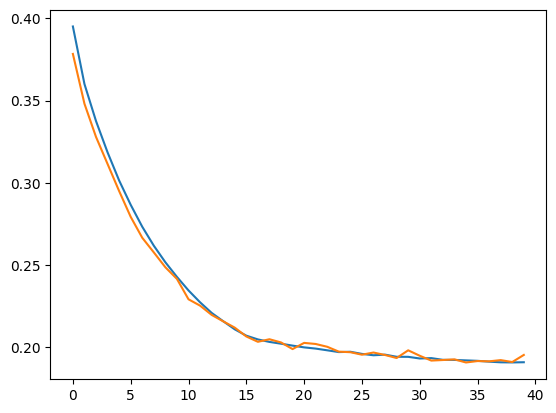

In [12]:
trainer.draw_history_plots()

# Вывод результатов

In [13]:
model.eval()
model.to('cpu')
for X_val, _ in val_dataloader:
  reconstructed = model(X_val)
  for i in range(8):
      img = transforms.ToPILImage()(reconstructed[i]/2+0.5)
      cl = transforms.ToPILImage()(X_val[i])
      cl.show()
      img.show()
  break